# Import Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Read Data

In [101]:
df = pd.read_csv('/content/drive/MyDrive/Itvedant class/Itvedant Home work/telecom_churn.csv')

# Data Inspection

In [102]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [103]:
df.shape

(7043, 21)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There is some string in TotalCharges column, converting that string to missing values and other string to float.

In [105]:
def tofloat(x):
  try:
    a = float(x)
    return a
  except:
    return np.nan

In [106]:
df.TotalCharges = df.TotalCharges.apply(tofloat)

Looking unique values

In [107]:
category_cols = []
for x in df.columns:
  if df[x].dtypes=='O':
    print(x,df[x].unique())
    print()

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender ['Female' 'Male']

Partner ['Yes' 'No']

Dependents ['No' 'Yes']

PhoneService ['No' 'Yes']

MultipleLines ['No phone service' 'No' 'Yes']

InternetService ['DSL' 'Fiber optic' 'No']

OnlineSecurity ['No' 'Yes' 'No internet service']

OnlineBackup ['Yes' 'No' 'No internet service']

DeviceProtection ['No' 'Yes' 'No internet service']

TechSupport ['No' 'Yes' 'No internet service']

StreamingTV ['No' 'Yes' 'No internet service']

StreamingMovies ['No' 'Yes' 'No internet service']

Contract ['Month-to-month' 'One year' 'Two year']

PaperlessBilling ['Yes' 'No']

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn ['No' 'Yes']



Replacing No internet service and No phone service with No


In [108]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [109]:
category_cols = []
for x in df.columns:
  if df[x].dtypes=='O':
    print(x,df[x].unique())
    print()

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender ['Female' 'Male']

Partner ['Yes' 'No']

Dependents ['No' 'Yes']

PhoneService ['No' 'Yes']

MultipleLines ['No' 'Yes']

InternetService ['DSL' 'Fiber optic' 'No']

OnlineSecurity ['No' 'Yes']

OnlineBackup ['Yes' 'No']

DeviceProtection ['No' 'Yes']

TechSupport ['No' 'Yes']

StreamingTV ['No' 'Yes']

StreamingMovies ['No' 'Yes']

Contract ['Month-to-month' 'One year' 'Two year']

PaperlessBilling ['Yes' 'No']

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn ['No' 'Yes']



# Checking Null Values

In [110]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Handling Missing Values

In [111]:
round(df.TotalCharges.median(),2)

1397.47

In [112]:
df.TotalCharges.fillna(round(df.TotalCharges.median(),2),inplace=True)

No Null Values now. Data is clean.

# Checking Outliers

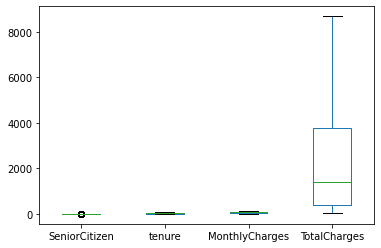

In [113]:
df.plot(kind='box')

No Outliers in the dataset.

# Target Variable

In [114]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [115]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [116]:
Y = df.Churn

In [117]:
Y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [118]:
Y = Y.map({'Yes':1,'No':0})

Yes = 1 = Customer will stop the service \
No  = 0 = Customer will continue the service \

FALSE NEGATIVE IS CRITICAL IN THIS CASE.
RECALL VALUE SHOULD BE CLOSE TO 1

Building Neural Network Models with following re-sampling techniques and observing the recall value:

1.   Without Re-sampling Techniques (Actual)
2.   Under Sampling
3.   Over Sampling
4.   SMOTE
5.   ADASYN
6.   SMOTE+TOMEK
7.   SMOTE+ENN



In [119]:
# Input Variables
X = df.drop('Churn',axis=1)

# Label Encoding of X

In [120]:
cols = []
for x in X.columns:
  if X[x].dtypes == 'O':
    cols.append(x)
cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in cols:
  X[x] = le.fit_transform(X[x])

# Split the Data

In [122]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

# Scaling of X

In [123]:
ind = X_train.index

In [124]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [125]:
X_train = pd.DataFrame(X_train,columns=X.columns,index=ind)

In [126]:
Y_train = pd.DataFrame(Y_train)

In [127]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5925,-1.121642,0.994337,-0.43979,-0.952835,-0.644551,-0.497482,0.326149,1.167151,-1.189694,-0.629762,1.390244,-0.722547,1.578449,1.266622,-0.804131,0.384266,0.827583,0.393711,0.129755,-0.379352
4395,0.196581,-1.005696,-0.43979,1.049500,1.551467,1.498180,0.326149,1.167151,0.167047,-0.629762,1.390244,1.383992,-0.633533,1.266622,1.243579,-0.822377,0.827583,0.393711,1.299897,2.278741
1579,1.528140,0.994337,2.27381,1.049500,-0.644551,-0.823305,0.326149,-0.856787,0.167047,-0.629762,-0.719298,-0.722547,-0.633533,-0.789501,1.243579,-0.822377,0.827583,0.393711,0.519802,-0.584746
1040,-1.314264,0.994337,2.27381,-0.952835,-0.644551,-0.741849,0.326149,-0.856787,0.167047,-0.629762,-0.719298,-0.722547,-0.633533,1.266622,1.243579,-0.822377,-1.208338,-0.546238,0.851757,-0.445510
1074,-1.027307,0.994337,-0.43979,-0.952835,-0.644551,-1.271311,0.326149,-0.856787,1.523787,-0.629762,-0.719298,-0.722547,-0.633533,-0.789501,-0.804131,-0.822377,-1.208338,1.333661,-1.450350,-0.994256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-1.472806,0.994337,2.27381,-0.952835,-0.644551,-0.945488,0.326149,1.167151,0.167047,-0.629762,-0.719298,1.383992,-0.633533,1.266622,1.243579,-0.822377,0.827583,0.393711,1.185372,-0.598674
5192,-0.526491,0.994337,-0.43979,-0.952835,1.551467,1.131630,0.326149,-0.856787,1.523787,-0.629762,-0.719298,-0.722547,-0.633533,-0.789501,-0.804131,1.590908,-1.208338,1.333661,-1.488525,-0.479096
3980,1.359226,0.994337,-0.43979,-0.952835,-0.644551,-0.171660,0.326149,1.167151,0.167047,-0.629762,1.390244,1.383992,-0.633533,1.266622,1.243579,-0.822377,0.827583,0.393711,1.357989,0.309689
235,-1.309819,0.994337,-0.43979,-0.952835,-0.644551,-1.230583,0.326149,1.167151,-1.189694,-0.629762,1.390244,-0.722547,-0.633533,-0.789501,-0.804131,-0.822377,0.827583,1.333661,-0.344940,-0.953266


In [128]:
Y_train

,Churn
5925,0
4395,1
1579,1
1040,1
1074,0
...,...
905,1
5192,0
3980,1
235,1


# Neural Network

1. Without Re-sampling Techniques


In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [130]:
X.shape[1]

20

In [131]:
model = Sequential()
model.add(Dense(8, activation="relu", input_dim=X.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [132]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [133]:
trained_model = model.fit(X_train, Y_train, epochs=150,batch_size=20)

Epoch 1/150
247/247 [==============================] - 1s 1ms/step - loss: 0.5283
Epoch 2/150
247/247 [==============================] - 0s 1ms/step - loss: 0.4588
Epoch 3/150
247/247 [==============================] - 0s 1ms/step - loss: 0.4464
Epoch 4/150
247/247 [==============================] - 0s 1ms/step - loss: 0.4403
Epoch 5/150
247/247 [==============================] - 0s 1ms/step - loss: 0.4362
Epoch 6/150
247/247 [==============================] - 0s 1ms/step - loss: 0.4330
Epoch 7/150
247/247 [==============================] - 0s 1ms/step - loss: 0.4314
Epoch 8/150
247/247 [==============================] - 0s 1ms/step - loss: 0.4287
Epoch 9/150
247/247 [==============================] - 0s 1ms/step - loss: 0.4268
Epoch 10/150
247/247 [==============================] - 0s 1ms/step - loss: 0.4256
Epoch 11/150
247/247 [==============================] - 0s 1ms/step - loss: 0.4248
Epoch 12/150
247/247 [==============================] - 0s 1ms/step - loss: 0.4233
Epoch 13/150


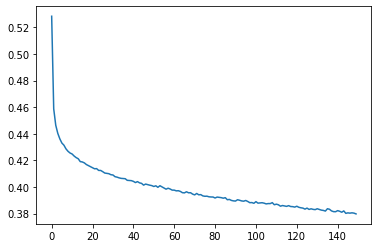

In [134]:
plt.plot(trained_model.history["loss"])

# Prediction

In [135]:
Y_pred = model.predict(X_test)

In [136]:
Y_pred = np.where(Y_pred >= 0.5,1,0)

# Evaluation

In [137]:
from sklearn.metrics import classification_report,recall_score,f1_score,precision_score,accuracy_score
print(classification_report(Y_test,Y_pred))
actual_acc = accuracy_score(Y_test,Y_pred)
actual_rec = recall_score(Y_test,Y_pred)
actual_p = precision_score(Y_test,Y_pred)
actual_f1 = f1_score(Y_test,Y_pred)
print('Recall ->',actual_rec)
print('Precision ->',actual_rec)
print('F1 Score ->',actual_f1)
print('Accuracy ->',actual_acc)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1585
           1       0.59      0.61      0.60       528

    accuracy                           0.80      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.80      0.80      0.80      2113

Recall -> 0.6079545454545454
Precision -> 0.6079545454545454
F1 Score -> 0.5977653631284916
Accuracy -> 0.795551348793185


2. Under Sampling

In [138]:
# Import the resampling package
from sklearn.utils import resample

In [139]:
# Split into training and test sets
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [140]:
# Returning to one dataframe
training_set = pd.concat([X_train, Y_train], axis=1)

In [141]:
training_set

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5925,-1.121642,0.994337,-0.43979,-0.952835,-0.644551,-0.497482,0.326149,1.167151,-1.189694,-0.629762,1.390244,-0.722547,1.578449,1.266622,-0.804131,0.384266,0.827583,0.393711,0.129755,-0.379352,0
4395,0.196581,-1.005696,-0.43979,1.049500,1.551467,1.498180,0.326149,1.167151,0.167047,-0.629762,1.390244,1.383992,-0.633533,1.266622,1.243579,-0.822377,0.827583,0.393711,1.299897,2.278741,1
1579,1.528140,0.994337,2.27381,1.049500,-0.644551,-0.823305,0.326149,-0.856787,0.167047,-0.629762,-0.719298,-0.722547,-0.633533,-0.789501,1.243579,-0.822377,0.827583,0.393711,0.519802,-0.584746,1
1040,-1.314264,0.994337,2.27381,-0.952835,-0.644551,-0.741849,0.326149,-0.856787,0.167047,-0.629762,-0.719298,-0.722547,-0.633533,1.266622,1.243579,-0.822377,-1.208338,-0.546238,0.851757,-0.445510,1
1074,-1.027307,0.994337,-0.43979,-0.952835,-0.644551,-1.271311,0.326149,-0.856787,1.523787,-0.629762,-0.719298,-0.722547,-0.633533,-0.789501,-0.804131,-0.822377,-1.208338,1.333661,-1.450350,-0.994256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-1.472806,0.994337,2.27381,-0.952835,-0.644551,-0.945488,0.326149,1.167151,0.167047,-0.629762,-0.719298,1.383992,-0.633533,1.266622,1.243579,-0.822377,0.827583,0.393711,1.185372,-0.598674,1
5192,-0.526491,0.994337,-0.43979,-0.952835,1.551467,1.131630,0.326149,-0.856787,1.523787,-0.629762,-0.719298,-0.722547,-0.633533,-0.789501,-0.804131,1.590908,-1.208338,1.333661,-1.488525,-0.479096,0
3980,1.359226,0.994337,-0.43979,-0.952835,-0.644551,-0.171660,0.326149,1.167151,0.167047,-0.629762,1.390244,1.383992,-0.633533,1.266622,1.243579,-0.822377,0.827583,0.393711,1.357989,0.309689,1
235,-1.309819,0.994337,-0.43979,-0.952835,-0.644551,-1.230583,0.326149,1.167151,-1.189694,-0.629762,1.390244,-0.722547,-0.633533,-0.789501,-0.804131,-0.822377,0.827583,1.333661,-0.344940,-0.953266,1


In [142]:
# Separating classes
churn = training_set[training_set.Churn == 1]
no_churn = training_set[training_set.Churn == 0]

In [143]:
len(churn)

1341

In [144]:
len(no_churn)

3589

Under sampling the majority

In [145]:
undersample = resample(no_churn,replace=True,n_samples=len(churn),random_state=10)

In [146]:
len(undersample) # len of no_churn is reduced to len of churn
# both are equal now

1341

In [147]:
# Returning to new training set
undersample_train = pd.concat([churn, undersample])

In [148]:
undersample_train.Churn.value_counts()

1    1341
0    1341
Name: Churn, dtype: int64

In [149]:
# Separate undersampled data into X and y sets
undersample_x_train = undersample_train.drop('Churn', axis=1)
undersample_y_train = undersample_train.Churn

In [150]:
undersample_x_train.shape

(2682, 20)

In [151]:
model = Sequential()
model.add(Dense(8, activation="relu", input_dim=20))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [152]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [153]:
trained_model = model.fit(undersample_x_train, undersample_y_train, epochs=150,batch_size=20)

Epoch 1/150
135/135 [==============================] - 1s 1ms/step - loss: 0.6269
Epoch 2/150
135/135 [==============================] - 0s 1ms/step - loss: 0.5403
Epoch 3/150
135/135 [==============================] - 0s 1ms/step - loss: 0.5165
Epoch 4/150
135/135 [==============================] - 0s 1ms/step - loss: 0.5074
Epoch 5/150
135/135 [==============================] - 0s 1ms/step - loss: 0.5011
Epoch 6/150
135/135 [==============================] - 0s 1ms/step - loss: 0.4976
Epoch 7/150
135/135 [==============================] - 0s 1ms/step - loss: 0.4930
Epoch 8/150
135/135 [==============================] - 0s 1ms/step - loss: 0.4903
Epoch 9/150
135/135 [==============================] - 0s 1ms/step - loss: 0.4870
Epoch 10/150
135/135 [==============================] - 0s 1ms/step - loss: 0.4849
Epoch 11/150
135/135 [==============================] - 0s 1ms/step - loss: 0.4836
Epoch 12/150
135/135 [==============================] - 0s 1ms/step - loss: 0.4817
Epoch 13/150


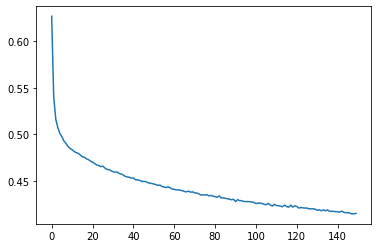

In [154]:
plt.plot(trained_model.history["loss"])

In [155]:
Y_pred = model.predict(X_test)

In [156]:
Y_pred = np.where(Y_pred >= 0.5,1,0)

In [157]:
print(classification_report(Y_test,Y_pred))
under_acc = accuracy_score(Y_test,Y_pred)
under_rec = recall_score(Y_test,Y_pred)
under_p = precision_score(Y_test,Y_pred)
under_f1 = f1_score(Y_test,Y_pred)
print('Recall ->',under_rec)
print('Precision ->',under_rec)
print('F1 Score ->',under_f1)
print('Accuracy ->',under_acc)

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1585
           1       0.47      0.79      0.59       528

    accuracy                           0.72      2113
   macro avg       0.69      0.75      0.69      2113
weighted avg       0.80      0.72      0.74      2113

Recall -> 0.7935606060606061
Precision -> 0.7935606060606061
F1 Score -> 0.5876577840112202
Accuracy -> 0.7217226691907241


3. Over Sampling the minority

In [158]:
oversample = resample(churn,replace=True,n_samples=len(no_churn),random_state=10)

In [159]:
# Returning to new training set
oversample_train = pd.concat([no_churn, oversample])

In [160]:
oversample_train.Churn.value_counts()


1    3589
0    3589
Name: Churn, dtype: int64

In [161]:
# Separate oversampled data into X and y sets
oversample_x_train = oversample_train.drop('Churn', axis=1)
oversample_y_train = oversample_train.Churn

In [162]:
model = Sequential()
model.add(Dense(8, activation="relu", input_dim=20))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [163]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [164]:
trained_model = model.fit(oversample_x_train, oversample_y_train, epochs=150,batch_size=20)

Epoch 1/150
359/359 [==============================] - 1s 1ms/step - loss: 0.6592
Epoch 2/150
359/359 [==============================] - 0s 1ms/step - loss: 0.5659
Epoch 3/150
359/359 [==============================] - 0s 1ms/step - loss: 0.5154
Epoch 4/150
359/359 [==============================] - 0s 1ms/step - loss: 0.5035
Epoch 5/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4969
Epoch 6/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4927
Epoch 7/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4888
Epoch 8/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4860
Epoch 9/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4836
Epoch 10/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4824
Epoch 11/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4807
Epoch 12/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4791
Epoch 13/150


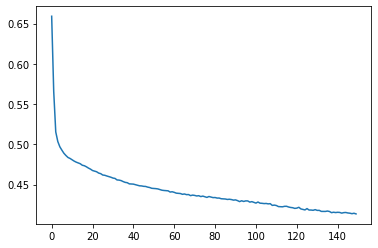

In [165]:
plt.plot(trained_model.history["loss"])

In [166]:
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred >= 0.5,1,0)

In [167]:
print(classification_report(Y_test,Y_pred))
over_acc = accuracy_score(Y_test,Y_pred)
over_rec = recall_score(Y_test,Y_pred)
over_p = precision_score(Y_test,Y_pred)
over_f1 = f1_score(Y_test,Y_pred)
print('Recall ->',over_rec)
print('Precision ->',over_rec)
print('F1 Score ->',over_f1)
print('Accuracy ->',over_acc)

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1585
           1       0.50      0.77      0.60       528

    accuracy                           0.75      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.75      0.76      2113

Recall -> 0.7689393939393939
Precision -> 0.7689393939393939
F1 Score -> 0.6028210838901261
Accuracy -> 0.7468054898248935


4. SMOTE (synthetic minority oversampling technique)

In [168]:
# Import the SMOTE package
from imblearn.over_sampling import SMOTE

In [169]:
# Synthesize minority class datapoints using SMOTE
sm = SMOTE(random_state=42)
smote_x_train, smote_y_train = sm.fit_resample(X_train, Y_train)

In [170]:
# Separate into training and test sets
smote_x_train = pd.DataFrame(smote_x_train, columns = X_train.columns)
smote_y_train = pd.DataFrame(smote_y_train, columns = ['Churn'])

In [171]:
model = Sequential()
model.add(Dense(8, activation="relu", input_dim=20))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [172]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [173]:
trained_model = model.fit(smote_x_train, smote_y_train, epochs=150,batch_size=20)

Epoch 1/150
359/359 [==============================] - 1s 1ms/step - loss: 0.6166
Epoch 2/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4921
Epoch 3/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4782
Epoch 4/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4712
Epoch 5/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4666
Epoch 6/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4626
Epoch 7/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4603
Epoch 8/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4574
Epoch 9/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4565
Epoch 10/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4556
Epoch 11/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4540
Epoch 12/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4530
Epoch 13/150


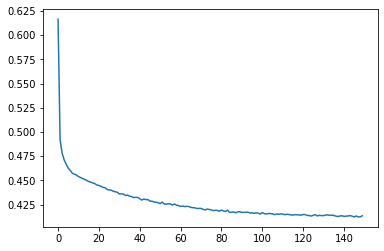

In [174]:
plt.plot(trained_model.history["loss"])

In [175]:
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred >= 0.5,1,0)

In [176]:
print(classification_report(Y_test,Y_pred))
smote_acc = accuracy_score(Y_test,Y_pred)
smote_rec = recall_score(Y_test,Y_pred)
smote_p = precision_score(Y_test,Y_pred)
smote_f1 = f1_score(Y_test,Y_pred)
print('Recall ->',smote_rec)
print('Precision ->',smote_rec)
print('F1 Score ->',smote_f1)
print('Accuracy ->',smote_acc)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1585
           1       0.47      0.77      0.59       528

    accuracy                           0.73      2113
   macro avg       0.69      0.74      0.69      2113
weighted avg       0.80      0.73      0.75      2113

Recall -> 0.7746212121212122
Precision -> 0.7746212121212122
F1 Score -> 0.5880661394680086
Accuracy -> 0.7288215806909607


In [177]:
smote_y_train.value_counts()

Churn
1        3589
0        3589
dtype: int64

5. ADASYN: Adaptive Synthetic Sampling Approach

In [178]:
from imblearn.over_sampling import ADASYN

# Synthesize minority class datapoints using SMOTE
ada = ADASYN(random_state=42)
ada_x_train, ada_y_train = ada.fit_resample(X_train, Y_train)

In [179]:
# Separate into training and test sets
ada_x_train = pd.DataFrame(ada_x_train, columns = X_train.columns)
ada_y_train = pd.DataFrame(ada_y_train, columns = ['Churn'])

In [180]:
ada_y_train.value_counts()

Churn
1        3640
0        3589
dtype: int64

In [181]:
model = Sequential()
model.add(Dense(8, activation="relu", input_dim=20))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [182]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [183]:
trained_model = model.fit(ada_x_train, ada_y_train, epochs=150,batch_size=20)

Epoch 1/150
362/362 [==============================] - 1s 1ms/step - loss: 0.6772
Epoch 2/150
362/362 [==============================] - 0s 1ms/step - loss: 0.5734
Epoch 3/150
362/362 [==============================] - 0s 1ms/step - loss: 0.5213
Epoch 4/150
362/362 [==============================] - 0s 1ms/step - loss: 0.5114
Epoch 5/150
362/362 [==============================] - 0s 1ms/step - loss: 0.5069
Epoch 6/150
362/362 [==============================] - 0s 1ms/step - loss: 0.5032
Epoch 7/150
362/362 [==============================] - 0s 1ms/step - loss: 0.5004
Epoch 8/150
362/362 [==============================] - 0s 1ms/step - loss: 0.4981
Epoch 9/150
362/362 [==============================] - 0s 1ms/step - loss: 0.4965
Epoch 10/150
362/362 [==============================] - 0s 1ms/step - loss: 0.4946
Epoch 11/150
362/362 [==============================] - 0s 1ms/step - loss: 0.4928
Epoch 12/150
362/362 [==============================] - 0s 1ms/step - loss: 0.4908
Epoch 13/150


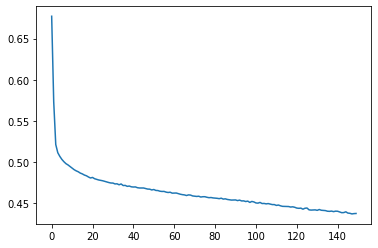

In [184]:
plt.plot(trained_model.history["loss"])

In [185]:
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred >= 0.5,1,0)

In [186]:
print(classification_report(Y_test,Y_pred))
ada_acc = accuracy_score(Y_test,Y_pred)
ada_rec = recall_score(Y_test,Y_pred)
ada_p = precision_score(Y_test,Y_pred)
ada_f1 = f1_score(Y_test,Y_pred)
print('Recall ->',ada_rec)
print('Precision ->',ada_rec)
print('F1 Score ->',ada_f1)
print('Accuracy ->',ada_acc)

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1585
           1       0.47      0.79      0.59       528

    accuracy                           0.72      2113
   macro avg       0.69      0.75      0.69      2113
weighted avg       0.80      0.72      0.74      2113

Recall -> 0.7897727272727273
Precision -> 0.7897727272727273
F1 Score -> 0.5889830508474576
Accuracy -> 0.7245622337908187


6. Hybridization: SMOTE + Tomek Links


In [187]:
from imblearn.combine import SMOTETomek

In [188]:
# oversampling using SMOTE+TOMEK
stom = SMOTETomek(random_state=42)
stom_x_train, stom_y_train = stom.fit_resample(X_train, Y_train)

In [189]:
# Separate into training and test sets
stom_x_train = pd.DataFrame(stom_x_train, columns = X_train.columns)
stom_y_train = pd.DataFrame(stom_y_train, columns = ['Churn'])

In [190]:
stom_y_train.value_counts()

Churn
1        3470
0        3470
dtype: int64

In [191]:
model = Sequential()
model.add(Dense(8, activation="relu", input_dim=20))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

trained_model = model.fit(stom_x_train, stom_y_train, epochs=150,batch_size=20)

Epoch 1/150
347/347 [==============================] - 1s 1ms/step - loss: 0.5956
Epoch 2/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4839
Epoch 3/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4642
Epoch 4/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4551
Epoch 5/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4497
Epoch 6/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4459
Epoch 7/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4427
Epoch 8/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4401
Epoch 9/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4377
Epoch 10/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4365
Epoch 11/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4340
Epoch 12/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4332
Epoch 13/150


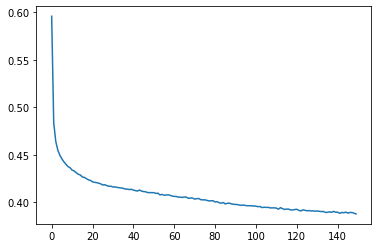

In [192]:
plt.plot(trained_model.history["loss"])

In [193]:
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred >= 0.5,1,0)


print(classification_report(Y_test,Y_pred))
smtom_acc = accuracy_score(Y_test,Y_pred)
smtom_rec = recall_score(Y_test,Y_pred)
smtom_p = precision_score(Y_test,Y_pred)
smtom_f1 = f1_score(Y_test,Y_pred)
print('Recall ->',smtom_rec)
print('Precision ->',smtom_rec)
print('F1 Score ->',smtom_f1)
print('Accuracy ->',smtom_acc)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1585
           1       0.52      0.74      0.61       528

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.76      0.77      2113

Recall -> 0.740530303030303
Precision -> 0.740530303030303
F1 Score -> 0.6076146076146076
Accuracy -> 0.7610033128253668


7. Hybridization: SMOTE + ENN


In [194]:
from imblearn.combine import SMOTEENN

In [195]:
# oversampling using SMOTE+ENN
senn = SMOTEENN(random_state=42)
senn_x_train, senn_y_train = senn.fit_resample(X_train, Y_train)

In [196]:
# Separate into training and test sets
senn_x_train = pd.DataFrame(senn_x_train, columns = X_train.columns)
senn_y_train = pd.DataFrame(senn_y_train, columns = ['Churn'])

In [197]:
senn_y_train.value_counts()

Churn
1        2621
0        1834
dtype: int64

In [198]:
model = Sequential()
model.add(Dense(8, activation="relu", input_dim=20))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

trained_model = model.fit(senn_x_train, senn_y_train, epochs=150,batch_size=20)

Epoch 1/150
223/223 [==============================] - 1s 1ms/step - loss: 0.4640
Epoch 2/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2671
Epoch 3/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2369
Epoch 4/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2268
Epoch 5/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2201
Epoch 6/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2152
Epoch 7/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2096
Epoch 8/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2054
Epoch 9/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2022
Epoch 10/150
223/223 [==============================] - 0s 1ms/step - loss: 0.1999
Epoch 11/150
223/223 [==============================] - 0s 1ms/step - loss: 0.1965
Epoch 12/150
223/223 [==============================] - 0s 1ms/step - loss: 0.1956
Epoch 13/150


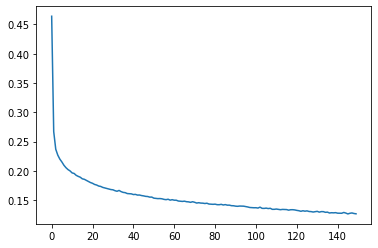

In [199]:
plt.plot(trained_model.history["loss"])

In [200]:
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred >= 0.5,1,0)


print(classification_report(Y_test,Y_pred))
smenn_acc = accuracy_score(Y_test,Y_pred)
smenn_rec = recall_score(Y_test,Y_pred)
smenn_p = precision_score(Y_test,Y_pred)
smenn_f1 = f1_score(Y_test,Y_pred)
print('Recall ->',smenn_rec)
print('Precision ->',smenn_rec)
print('F1 Score ->',smenn_f1)
print('Accuracy ->',smenn_acc)

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1585
           1       0.46      0.85      0.59       528

    accuracy                           0.71      2113
   macro avg       0.69      0.76      0.68      2113
weighted avg       0.81      0.71      0.73      2113

Recall -> 0.8541666666666666
Precision -> 0.8541666666666666
F1 Score -> 0.5938117182356814
Accuracy -> 0.7079981069569332


In [201]:
performance = pd.DataFrame([[actual_acc,under_acc,over_acc,smote_acc,ada_acc,smtom_acc,smenn_acc],
              [actual_rec,under_rec,over_rec,smote_rec,ada_rec,smtom_rec,smenn_rec],
              [actual_p,under_p,over_p,smote_p,ada_p,smtom_p,smenn_p],
              [actual_f1,under_f1,over_f1,smote_f1,ada_f1,smtom_f1,smenn_f1]]).T

performance.columns=['Accuracy','Recall','Precision','F1 Score']
performance.index=['Actual','Under_Sampling','Over_Sampling','SMOTE','ADASYN','SMOTE+TOMEK','SMOTE+ENN']

In [202]:
performance

,Accuracy,Recall,Precision,F1 Score
Actual,0.795551,0.607955,0.587912,0.597765
Under_Sampling,0.721723,0.793561,0.466592,0.587658
Over_Sampling,0.746805,0.768939,0.495726,0.602821
SMOTE,0.728822,0.774621,0.473928,0.588066
ADASYN,0.724562,0.789773,0.469595,0.588983
SMOTE+TOMEK,0.761003,0.740530,0.515152,0.607615
SMOTE+ENN,0.707998,0.854167,0.455096,0.593812


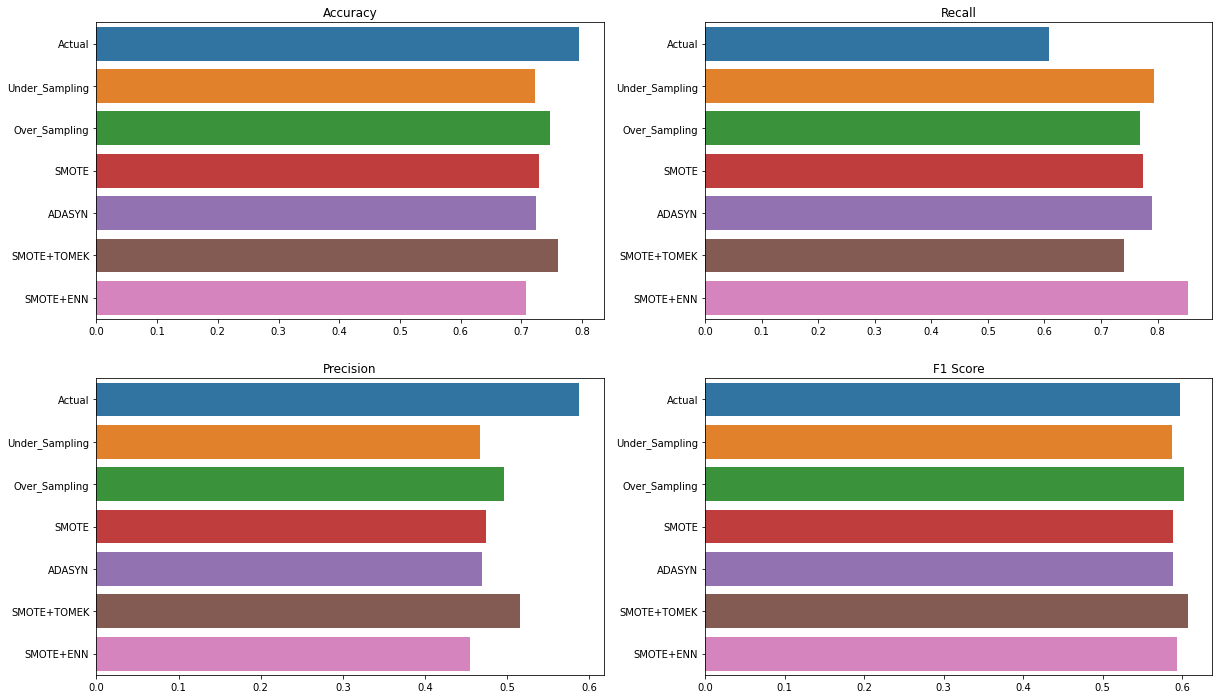

In [203]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x=performance.Accuracy.values,y=performance.Accuracy.index)
plt.title('Accuracy')

plt.subplot(2,2,2)
sns.barplot(x=performance.Recall.values,y=performance.Recall.index)
plt.title('Recall')

plt.subplot(2,2,3)
sns.barplot(x=performance.Precision.values,y=performance.Precision.index)
plt.title('Precision')

plt.subplot(2,2,4)
sns.barplot(x=performance['F1 Score'].values,y=performance['F1 Score'].index)
plt.title('F1 Score')

plt.show()